# Tara dataset

In [1]:
# imports
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time
#import random 

import pandas

from oceancolor.tara import io as tara_io

from cnmf.oceanography import iops

In [2]:
%matplotlib ipympl

# Load up

In [3]:
tara = tara_io.load_pg_db()

# Explore a bit

In [4]:
tara.iloc[0]

dt                                         30-May-2016 07:05:00
lat                                                    45.67375
lon                                                   -8.814967
t                                                       15.5537
s                                                       35.5332
                                    ...                        
hbb_bbp_25                                                  NaN
hbb_bbp_26                                                  NaN
hbb_bbp_27                                                  NaN
hbb_bbp_28                                                  NaN
geometry      b'\x01\x01\x00\x00\x00K\xd9\x9bOC\xa1!\xc0\xe1...
Name: 2016-05-30 07:05:00, Length: 391, dtype: object

In [5]:
np.array(tara.keys())

array(['dt', 'lat', 'lon', 't', 's', 'ad_model400', 'agaus406',
       'agaus434', 'agaus453', 'agaus470', 'agaus492', 'agaus523',
       'agaus550', 'agaus584', 'agaus617', 'agaus638', 'agaus660',
       'agaus675', 'agaus-mae', 'POC_cp', 'ap676_lh', 'Chl_lineheight',
       'cp_gamma', 'Halh', 'chl_Halh', 'HH_G50', 'HH_mphi', 'flag_bit',
       'ap_n', 'cp_n', 'POC_chl_ratio', 'gamma_chl_ratio',
       'Chl_lineheight_old_coef', 'chl_Halh_old_coef', 'Chlac_agaus406',
       'Chla_agaus434', 'Chlbc_weighted_agaus453', 'Chlb_agaus470',
       'PPC_agaus492', 'PSC_agaus523', 'Chlc_agaus584', 'Chla_agaus617',
       'Chlc_agaus638', 'Chlb_agaus660', 'Chla_agaus675', 'datetime',
       'acs_num', 'ap408.5', 'ap411.9', 'ap415.3', 'ap419.2', 'ap423.5',
       'ap427.6', 'ap431.5', 'ap435.7', 'ap439.3', 'ap443.5', 'ap447.9',
       'ap452.7', 'ap457.1', 'ap461', 'ap465.4', 'ap469.8', 'ap474.3',
       'ap479', 'ap483.8', 'ap488.1', 'ap492.3', 'ap496.5', 'ap500.8',
       'ap505.4', 'ap509.9'

## Dates

In [6]:
tara.index.date

array([datetime.date(2016, 5, 30), datetime.date(2016, 5, 30),
       datetime.date(2016, 5, 30), ..., datetime.date(2022, 7, 7),
       datetime.date(2022, 7, 7), datetime.date(2022, 7, 7)], dtype=object)

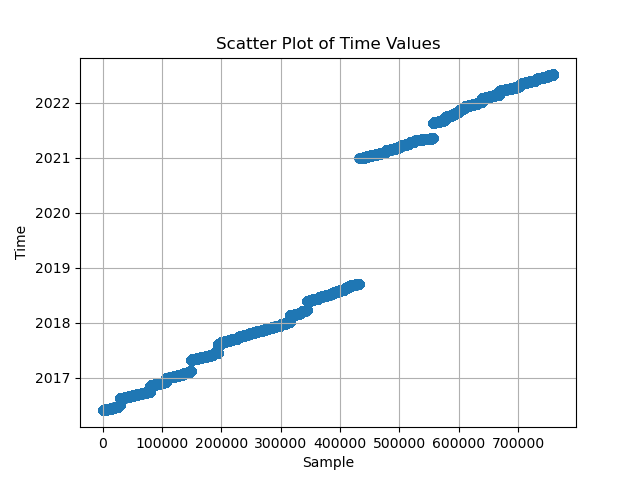

In [7]:
# Create the scatter plot
times = tara.index.time
fig, ax = plt.subplots()
ax.scatter(range(len(times)), tara.index)

# Format the plot
ax.set_xlabel('Sample')
ax.set_ylabel('Time')
ax.set_title('Scatter Plot of Time Values')
ax.grid(True)

plt.show()

# Patrick says take those after 2020

In [8]:
keep = tara.index > pandas.Timestamp(2020,1,1)

In [9]:
np.sum(keep)

326682

In [10]:
len(tara)

759418

In [11]:
tara = tara[keep]

# Examine the bluest data

In [20]:
tara['ap408.5']

utc_dt
2020-12-26 20:12:00    0.027256
2020-12-26 20:13:00    0.027256
2020-12-26 20:14:00    0.027331
2020-12-26 20:15:00    0.026619
2020-12-26 20:16:00    0.026006
                         ...   
2022-07-07 06:40:00    0.297237
2022-07-07 06:41:00    0.229981
2022-07-07 06:42:00    0.263437
2022-07-07 06:43:00    0.282787
2022-07-07 06:44:00    0.268662
Name: ap408.5, Length: 326682, dtype: float64

In [17]:
np.array(tara.keys())

array(['dt', 'lat', 'lon', 't', 's', 'ad_model400', 'agaus406',
       'agaus434', 'agaus453', 'agaus470', 'agaus492', 'agaus523',
       'agaus550', 'agaus584', 'agaus617', 'agaus638', 'agaus660',
       'agaus675', 'agaus-mae', 'POC_cp', 'ap676_lh', 'Chl_lineheight',
       'cp_gamma', 'Halh', 'chl_Halh', 'HH_G50', 'HH_mphi', 'flag_bit',
       'ap_n', 'cp_n', 'POC_chl_ratio', 'gamma_chl_ratio',
       'Chl_lineheight_old_coef', 'chl_Halh_old_coef', 'Chlac_agaus406',
       'Chla_agaus434', 'Chlbc_weighted_agaus453', 'Chlb_agaus470',
       'PPC_agaus492', 'PSC_agaus523', 'Chlc_agaus584', 'Chla_agaus617',
       'Chlc_agaus638', 'Chlb_agaus660', 'Chla_agaus675', 'datetime',
       'acs_num', 'ap408.5', 'ap411.9', 'ap415.3', 'ap419.2', 'ap423.5',
       'ap427.6', 'ap431.5', 'ap435.7', 'ap439.3', 'ap443.5', 'ap447.9',
       'ap452.7', 'ap457.1', 'ap461', 'ap465.4', 'ap469.8', 'ap474.3',
       'ap479', 'ap483.8', 'ap488.1', 'ap492.3', 'ap496.5', 'ap500.8',
       'ap505.4', 'ap509.9'

# Prep for NMF

In [23]:
reload(iops)
wv_grid, final_tara, l23_a = iops.tara_matched_to_l23(low_cut=405.)

Loading Tara..


/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:265: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:266: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)


In [24]:
wv_grid.min()

410.0

In [25]:
final_tara.shape

(229283, 59)

In [26]:
l23_a.shape

(3320, 59)

## Plot a few

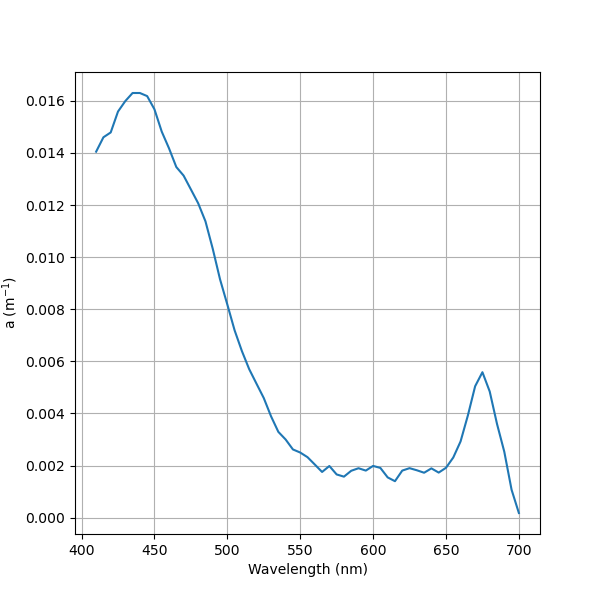

In [27]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
#
ax.plot(wv_grid, final_tara[1000])

# Format the plot
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'a (m$^{-1}$)')
#ax.set_title('Scatter Plot of Time Values')
ax.grid(True)

plt.show()